# Домашнее задание

1. Генерим 21 сигналов (временных рядов), 3 класса по 7 образцов в каждом. 
Постарайтесь сделать их как можно более похожими, и в тоже время различными. 

1. Рассчитываем расстояние между ними по формуле Евклида и с помощью DTW

1. Описываем кратко полученные значения

1. Формируем из нагенеренных временных рядов набор данных для обучения

1. Разбиваем набор на train и test

1. Обучаем  классификаторы KNN с DTW, KNN со стандартной метрикой расстояния, TimeSeriesForest

1. Описываем кратко полученные результаты

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import random

myseed = 10
random.seed(myseed)
np.random.seed(myseed)
     

In [84]:
def laplace(x, mu=0.5, b=0.5):
    return np.exp(-np.abs(x - mu) / b) / (2 * b)

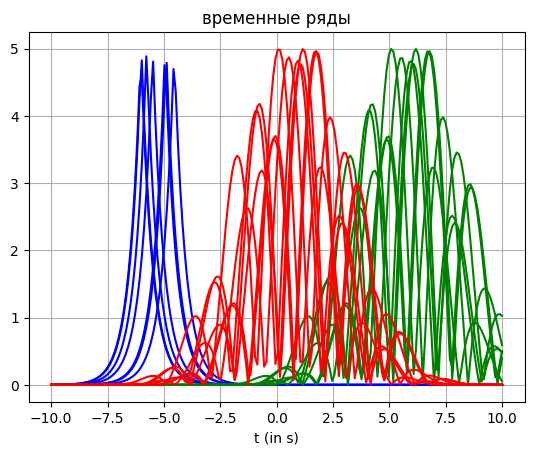

In [85]:
time_index = np.linspace(-10, 10, num=200)

tseries_list = {'Time': time_index}
arr_rand = np.random.random(size=10)

rand_const = np.random.randint(10, 20)
N = 7


for i in range(1, N + 1):
    tseries_list[f"laplace {i}"] = laplace(time_index + 2 * arr_rand[i] + 5) * 5
for i in range(1, N + 1):
    tseries_list[f"sin {i}"] = 5 * np.abs(np.sin(np.pi * (time_index - 5 * arr_rand[i]) / 2) * np.exp(-((time_index - 2 * arr_rand[i] - 5) / 3) ** 2))
for i in range(1, N + 1):
    tseries_list[f"cos {i}"] = 5 * np.abs(np.cos(np.pi * (time_index - 5 * arr_rand[i]) / 2) * np.exp(-((time_index - 2 * arr_rand[i]) / 3) ** 2))


for i in range(1, N + 1):
    plt.plot(time_index, tseries_list[f"laplace {i}"], '-b')
for i in range(1, N + 1):
    plt.plot(time_index, tseries_list[f"sin {i}"], '-g')
for i in range(1, N + 1):
    plt.plot(time_index, tseries_list[f"cos {i}"], '-r')
            
plt.title(r'временные ряды')
plt.xlabel(r't (in s)')
plt.grid()

### Расстояние по формуле Евклида и DTW

In [86]:
from scipy.spatial.distance import euclidean
from dtaidistance import dtw

euclidean_distance = np.array([])
dtw_distance = np.array([])

for i in range(1, N // 2 + 1):
    x = np.abs(tseries_list[f"laplace {i}"])
    y = np.abs(tseries_list[f"laplace {7 - i}"])
    distance_euclidean = euclidean(x, y)
    distance_dtw = dtw.distance(x, y)
    euclidean_distance = np.append(euclidean_distance, distance_euclidean)
    dtw_distance = np.append(dtw_distance, distance_dtw)
    print(f"эвклидово расстояние для laplace: {i} и {7 - i}:", distance_euclidean)
    print(f"dtw для laplace: {i} и {7 - i}:", distance_dtw)

for i in range(1, N // 2 + 1):
    x = np.abs(tseries_list[f"sin {i}"])
    y = np.abs(tseries_list[f"sin {7 - i}"])
    distance_euclidean = euclidean(x, y)
    distance_dtw = dtw.distance(x, y)
    euclidean_distance = np.append(euclidean_distance, distance_euclidean)
    dtw_distance = np.append(dtw_distance, distance_dtw)
    print(f"эвклидово расстояние для sin: {i} и {7 - i}:", distance_euclidean)
    print(f"dtw для sin: {i} и {7 - i}:", distance_dtw)


for i in range(1, N // 2 + 1):
    x = np.abs(tseries_list[f"cos {i}"])
    y = np.abs(tseries_list[f"cos {7 - i}"])
    distance_euclidean = euclidean(x, y)
    distance_dtw = dtw.distance(x, y)
    euclidean_distance = np.append(euclidean_distance, distance_euclidean)
    dtw_distance = np.append(dtw_distance, distance_dtw)
    print(f"эвклидово расстояние для cos: {i} и {7 - i}:", distance_euclidean)
    print(f"dtw для cos: {i} и {7 - i}:", distance_dtw)



эвклидово расстояние для laplace: 1 и 6: 6.264143065732314
dtw для laplace: 1 и 6: 1.053923956736152
эвклидово расстояние для laplace: 2 и 5: 11.015581196344094
dtw для laplace: 2 и 5: 0.30541773772919445
эвклидово расстояние для laplace: 3 и 4: 8.126165376410299
dtw для laplace: 3 и 4: 0.04285925229047973
эвклидово расстояние для sin: 1 и 6: 18.291906999859926
dtw для sin: 1 и 6: 2.766420192873871
эвклидово расстояние для sin: 2 и 5: 5.9177072881648005
dtw для sin: 2 и 5: 3.986602216366787
эвклидово расстояние для sin: 3 и 4: 17.356443026790878
dtw для sin: 3 и 4: 3.968075413827102
эвклидово расстояние для cos: 1 и 6: 18.238177835843743
dtw для cos: 1 и 6: 2.6983580725523213
эвклидово расстояние для cos: 2 и 5: 6.0092437200485955
dtw для cos: 2 и 5: 4.042722702892377
эвклидово расстояние для cos: 3 и 4: 17.43794156941757
dtw для cos: 3 и 4: 3.8788056631208763


### Разница между ними

In [87]:
diff = euclidean_distance - dtw_distance
print("Средняя разница: ", np.mean(diff)) 

Средняя разница:  9.546013874469228


В среднем эвлекидова метрика больше

### Наборы данных для обучения

In [88]:
x = []  
Y = []  

for v in tseries_list:
    if v!= 'Time':
        x.append(tseries_list[v])
        c = v[:-1]
        if c == "laplace ":
            Y.append(1)
        elif c == "sin ":
            Y.append(2)
        else: Y.append(3)
Y


[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3]

### train/test

In [89]:
arr = np.arange(len(Y))
np.random.shuffle(arr)


X_train = []
X_test = []
y_train = []
y_test = []

for i in arr[:-7]:
    X_train.append(x[i])
    y_train.append(Y[i])

for i in arr[len(X_train):]:
    X_test.append(x[i])
    y_test.append(Y[i])

y_train, y_test

([1, 2, 1, 2, 2, 1, 3, 1, 2, 3, 3, 1, 2, 3], [2, 1, 2, 3, 1, 3, 3])

### Обучение

### DTW метрика

In [90]:
from pyts.classification import KNeighborsClassifier

clf = KNeighborsClassifier(metric='dtw')
clf.fit(X_train, y_train)

print(f"Accuracy {clf.score(X_test, y_test)}")
for i in range(len(y_test)):
    print(f"{i + 1} объект:")
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {y_test[i]}")

Accuracy 0.8571428571428571
1 объект:
Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 2
2 объект:
Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1
3 объект:
Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 2
4 объект:
Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 3
5 объект:
Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1
6 объект:
Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 3
7 объект:
Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 3


### Стандартная метрика 

In [91]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

print(f"Accuracy {clf.score(X_test, y_test)}")
for i in range(len(y_test)):
    print(f"{i + 1} объект:")
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {y_test[i]}")

Accuracy 1.0
1 объект:
Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 2
2 объект:
Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1
3 объект:
Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 2
4 объект:
Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 3
5 объект:
Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1
6 объект:
Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 3
7 объект:
Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 3


### TimeSeriesForest

In [92]:
from pyts.classification import TimeSeriesForest
 
clf = TimeSeriesForest(random_state=43)
clf.fit(X_train, y_train)


print(f"Accuracy {clf.score(X_test, y_test)}")
for i in range(len(y_test)):
    print(f"{i + 1} объект:")
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {y_test[i]}")

Accuracy 1.0
1 объект:
Вектор вероятности принадлежности к классам [[0.028 0.936 0.036]]
Истинный класс для предсказаний 2
2 объект:
Вектор вероятности принадлежности к классам [[0.99  0.008 0.002]]
Истинный класс для предсказаний 1
3 объект:
Вектор вероятности принадлежности к классам [[0.018 0.946 0.036]]
Истинный класс для предсказаний 2
4 объект:
Вектор вероятности принадлежности к классам [[0.02  0.068 0.912]]
Истинный класс для предсказаний 3
5 объект:
Вектор вероятности принадлежности к классам [[0.992 0.004 0.004]]
Истинный класс для предсказаний 1
6 объект:
Вектор вероятности принадлежности к классам [[0.026 0.064 0.91 ]]
Истинный класс для предсказаний 3
7 объект:
Вектор вероятности принадлежности к классам [[0.054 0.016 0.93 ]]
Истинный класс для предсказаний 3


### Итог: Все классификаторы правильно предсказали принадлежность объектов к классам